In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import pandas_profiling
from sklearn.model_selection import cross_val_score

import warnings

sns.set(style="white")
warnings.filterwarnings('ignore')

In [4]:
glass = pd.read_csv("C:\\Users\\Clide Dcosta\
\Desktop\\data science and decision making\\glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass.isna().sum() 

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
pandas_profiling.ProfileReport(glass)

Number of variables,10
Number of observations,214
Total Missing (%),0.0%
Total size in memory,16.8 KiB
Average record size in memory,80.4 B
Numeric,10
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [9]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


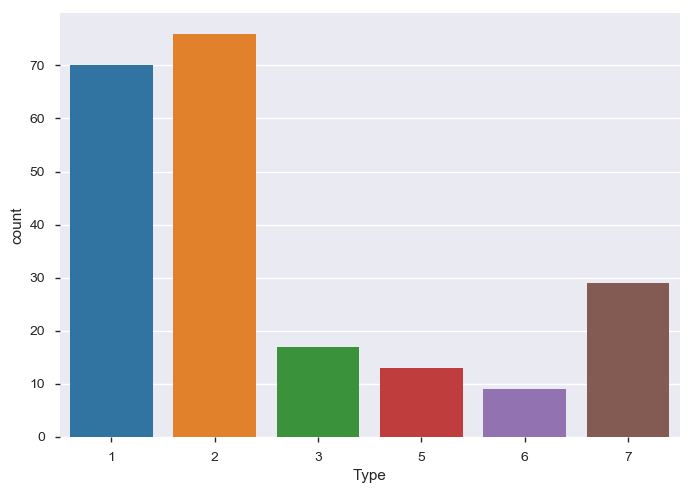

In [11]:
sns.countplot(glass['Type'])

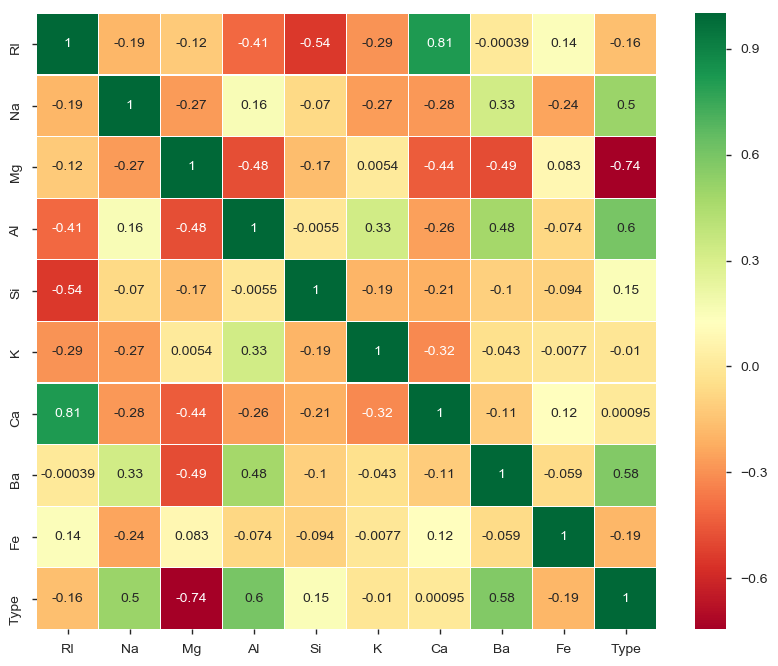

In [13]:
corr = glass.corr()
sns.heatmap(data=corr,annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


In [16]:
features = glass.loc[:,glass.columns != 'Type']
target = glass.loc[:,'Type']

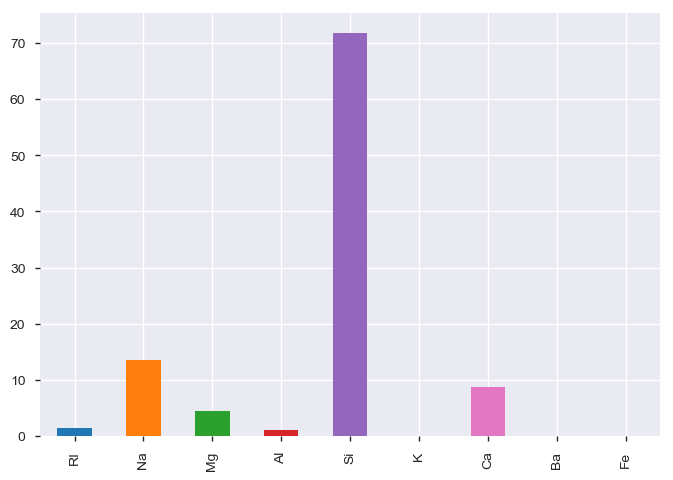

In [19]:
corrmat = features.corr()
corrmat

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


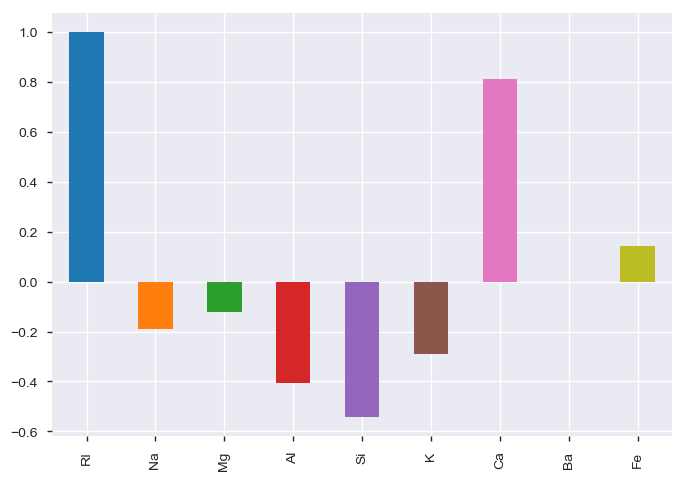

In [22]:
#RI - Refractive index, In optics, the refractive index or index of refraction of a material is a dimensionless number 
#that describes how light propagates through that medium. This is an important factor that differentiates any glass type.
corrmat.iloc[0,:].plot(kind='bar')

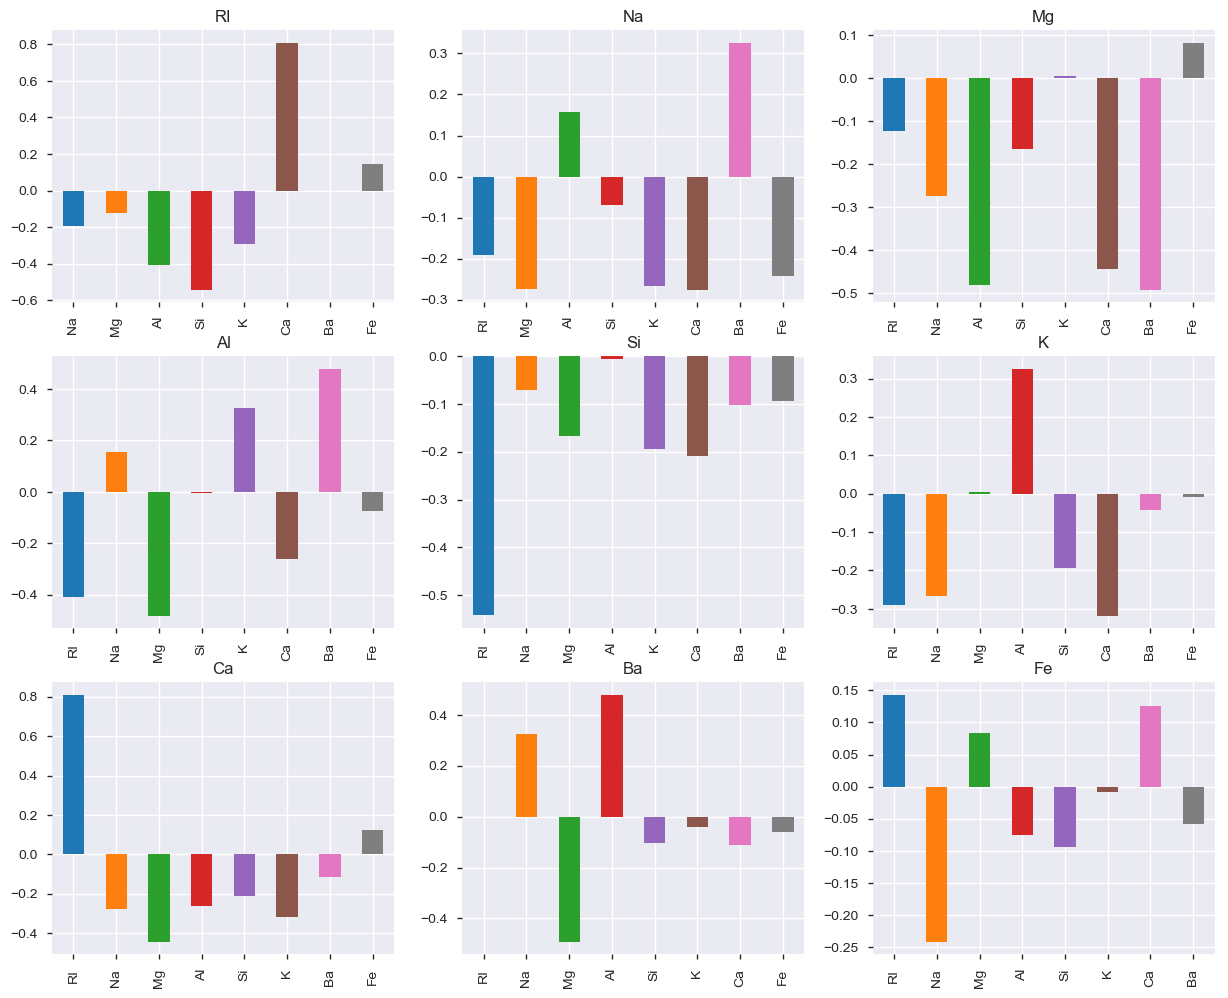

In [24]:
import matplotlib.pyplot as plt
chartlocation = 0
plt.figure(figsize=(15,12))
columns = np.copy(corrmat.columns.values)
for index, row in corrmat.iterrows():
    column_name = columns[chartlocation]
    chartlocation = chartlocation + 1
    plt.subplot(3,3,chartlocation)
    row.drop(index).plot(kind='bar', title=column_name)

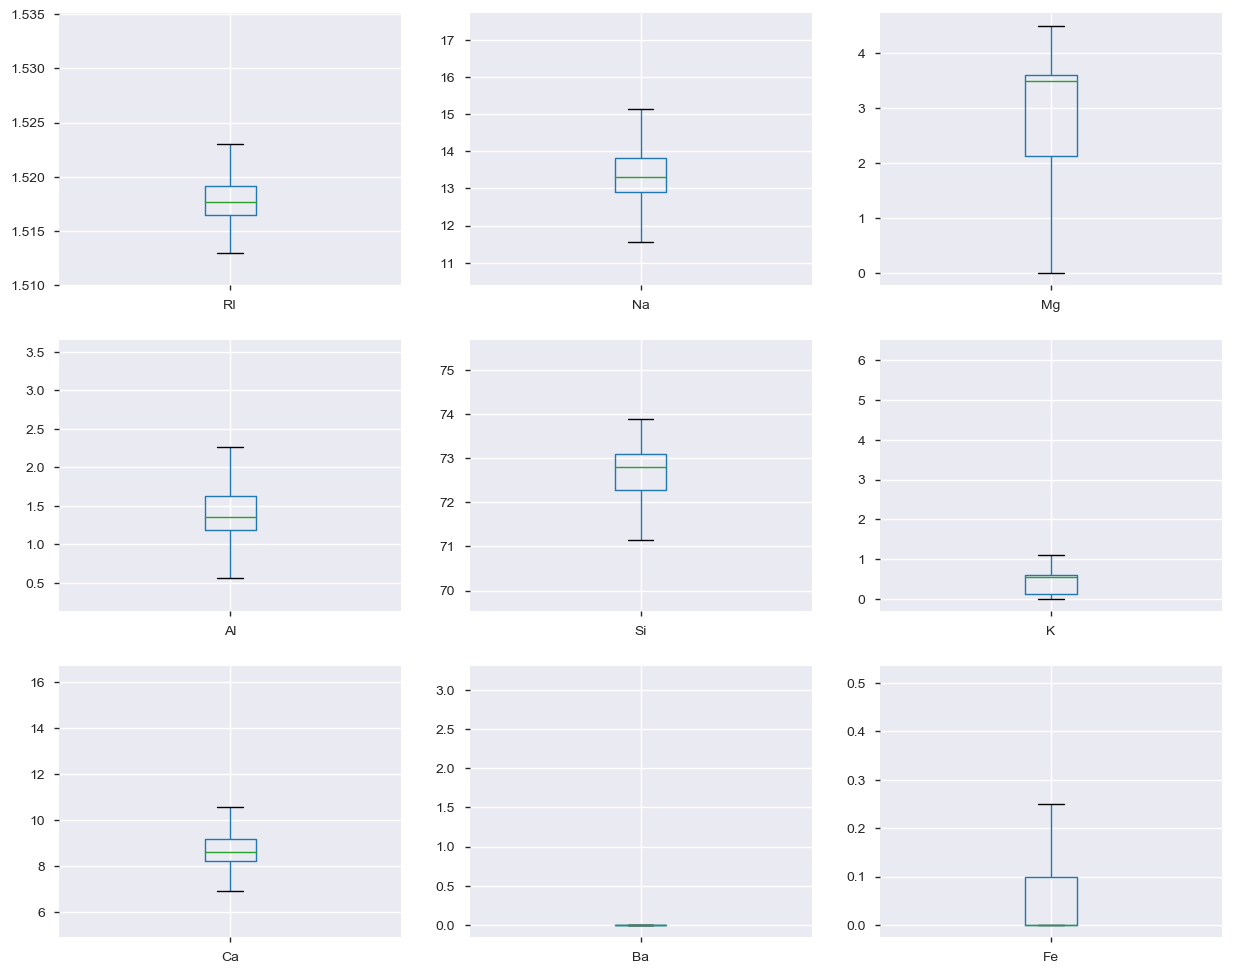

In [25]:
#Checking for outliers in the data
chartlocation = 0
plt.figure(figsize=(15,12))
columns = features.columns.values
for column in columns:
    chartlocation = chartlocation + 1
    plt.subplot(3,3,chartlocation)
    features.boxplot(column=column)

In [29]:
from sklearn.model_selection import train_test_split
X_train = glass.iloc[:,1:len(glass.columns)-1] # this represents the input Features
Y_train = glass.loc[:,'Type']
# Scaling features (only feature NOT observation)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Scaling - brings to range (0 to 1)
ScaleFn = MinMaxScaler()
X_Scale = ScaleFn.fit_transform(X_train)
# Standardise - brings to Zero mean, Unit variance
ScaleFn = StandardScaler()
X_Strd = ScaleFn.fit_transform(X_train)

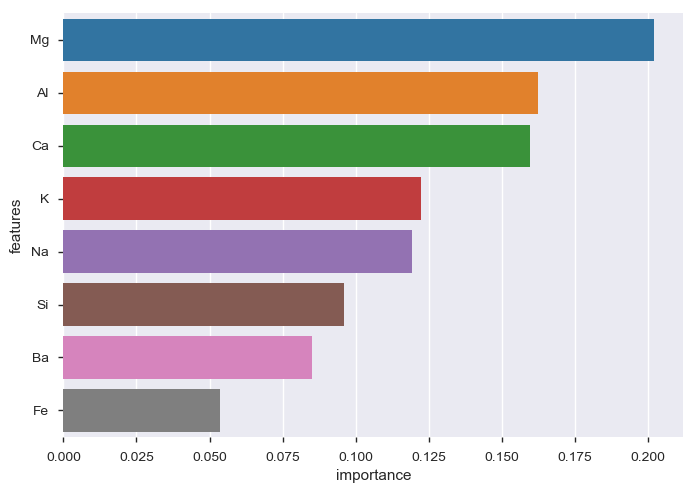

In [34]:
#Feature selection
clf = ExtraTreesClassifier()
clf.fit(X_train,Y_train)
df = pd.DataFrame({"importance":clf.feature_importances_, "features":X_train.columns.values})
df = df.sort_values("importance", ascending=False)
sns.barplot(x="importance", y="features", data=df)